In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
def macd(signals):
    
    global ma1
    global ma2
    
    print(ma1)
    
    signals['ma1']=signals['Close'].rolling(window=ma1,min_periods=1,center=False).mean()
    signals['ma2']=signals['Close'].rolling(window=ma2,min_periods=1,center=False).mean()
    
    return signals

In [3]:
def signal_generation(df,method):
    
    signals=method(df)
    signals['positions']=0

    #positions becomes and stays one once the short moving average is above long moving average
    signals['positions'][ma1:]=np.where(signals['ma1'][ma1:]>=signals['ma2'][ma1:],1,0)

    #as positions only imply the holding
    #we take the difference to generate real trade signal
    signals['signals']=signals['positions'].diff()

    #oscillator is the difference between two moving average
    #when it is positive, we long, vice versa
    signals['oscillator']=signals['ma1']-signals['ma2']

    return signals

In [4]:
def plot(new, ticker):
    
    #the first plot is the actual close price with long/short positions
    fig=plt.figure()
    ax=fig.add_subplot(111)
    
    new['Close'].plot(label=ticker)
    ax.plot(new.loc[new['signals']==1].index,new['Close'][new['signals']==1],label='LONG',lw=0,marker='^',c='g')
    ax.plot(new.loc[new['signals']==-1].index,new['Close'][new['signals']==-1],label='SHORT',lw=0,marker='v',c='r')

    plt.legend(loc='best')
    plt.grid(True)
    plt.title('Positions')
    
    plt.show()
    
    #the second plot is long/short moving average with oscillator
    #note that i use bar chart for oscillator
    fig=plt.figure()
    cx=fig.add_subplot(211)

    new['oscillator'].plot(kind='bar',color='r')

    plt.legend(loc='best')
    plt.grid(True)
    plt.xticks([])
    plt.xlabel('')
    plt.title('MACD Oscillator')

    bx=fig.add_subplot(212)

    new['ma1'].plot(label='ma1')
    new['ma2'].plot(label='ma2',linestyle=':')
    
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

In [5]:
def main():
    
    #input the long moving average and short moving average period
    #for the classic MACD, it is 12 and 26
    #once a upon a time you got six trading days in a week
    #so it is two week moving average versus one month moving average
    #for now, the ideal choice would be 10 and 21

    #macd is easy and effective
    #there is just one issue
    #entry signal is always late
    #watch out for downward EMA spirals!
    global ma1
    global ma2
    
    ma1=10
    ma2=21
    stdate='2016-01-01'
    eddate='2019-07-22'
    ticker='BA'

    #downloading data
    df=yf.download(ticker,start=stdate,end=eddate)
    
    new=signal_generation(df,macd)
    plot(new, ticker)

[*********************100%***********************]  1 of 1 downloaded
10


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


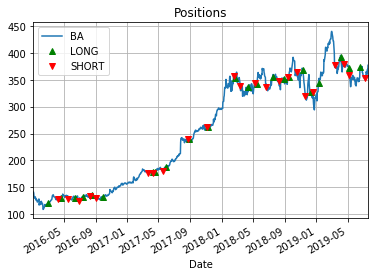

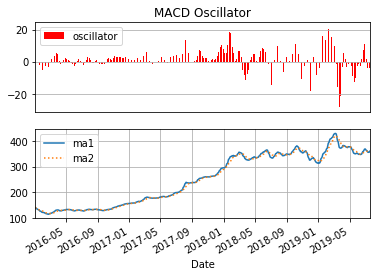

In [6]:
if __name__ == '__main__':
    main()